In [12]:
import os
import numpy as np
from ultralytics import YOLO
import cv2
import pandas as pd

def process_image(image_path, yolo_model):
    # 读取源图像
    source = cv2.imread(image_path)
    source = cv2.resize(source, (640, 640))

    # 进行目标检测
    result = yolo_model(source, save=False)

    lab_values = []

    # 检查是否有掩码数据
    if result[0].masks is not None and len(result[0].masks) > 0:
        masks_data = result[0].masks.data
        for mask in masks_data:
            mask = (mask.cpu().numpy() * 255).astype(np.uint8)
            ret, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

            # 使用掩码将感兴趣区域遮罩出来
            roi = cv2.bitwise_and(source, cv2.merge([binary_mask, binary_mask, binary_mask]))

            # 转换为Lab颜色空间
            roi_lab = cv2.cvtColor(roi, cv2.COLOR_BGR2Lab)

            # 计算Lab各通道的平均值
            l_mean, a_mean, b_mean = cv2.mean(roi_lab, mask=binary_mask)[:3]
            lab_values.append((l_mean, a_mean, b_mean))

    return lab_values

# 初始化YOLO模型
yolo = YOLO("runs/train/exp-seg-goldyolo-use/weights/best.pt", task="detect")

# 指定图片文件夹路径
folder_path = 'datasets/stage/stage4'

# 用于存储每张图片的Lab信息
image_lab_data = []

# 遍历文件夹中的所有图片
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # 确保只处理图片文件
        image_path = os.path.join(folder_path, filename)
        lab_values = process_image(image_path, yolo)
        
        # 为每个掩码添加一行数据
        for i, lab in enumerate(lab_values):
            image_lab_data.append({
                'Image': filename,
                'Mask': i+1,
                'L': lab[0],
                'a': lab[1],
                'b': lab[2]
            })
        
        print(f"Processed {filename}")

# 创建DataFrame
df = pd.DataFrame(image_lab_data)

# 保存到Excel文件
excel_path = 'stage4-Lab.xlsx'
df.to_excel(excel_path, index=False)

print(f"Lab data has been saved to {excel_path}")


0: 640x640 18 Stage4s, 31.0ms
Speed: 7.0ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Processed 7_20240314141016.jpg

0: 640x640 1 Stage2, 11 Stage4s, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed 7_202403141410161.jpg

0: 640x640 7 Stage4s, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed 7_202403141410163.jpg

0: 640x640 5 Stage4s, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Processed 7_20240314141017.jpg

0: 640x640 2 Stage4s, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processed 7_20240314141018.jpg

0: 640x640 3 Stage4s, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Processed 7_20240314141019.jpg

0: 640x640 2 Stage4s, 6.0ms
Speed: 2.0ms prepro

In [13]:
result[0]

NameError: name 'result' is not defined

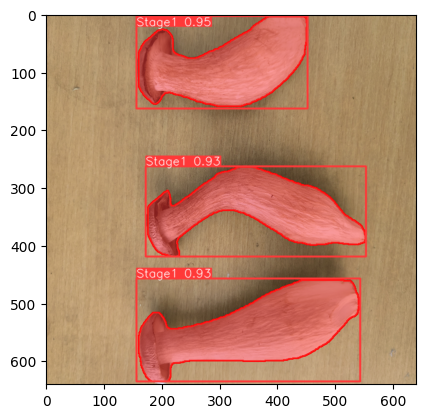

In [ ]:
# 检测结果可视化
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(result[0].plot()[:,:,::-1])

In [ ]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0.], device='cuda:0')
conf: tensor([0.9505, 0.9322, 0.9306], device='cuda:0')
data: tensor([[156.0634,   3.0899, 452.5447, 163.4397,   0.9505,   0.0000],
        [172.0033, 263.6046, 553.7290, 419.2993,   0.9322,   0.0000],
        [156.0699, 457.4121, 543.0704, 635.3986,   0.9306,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([3, 6])
xywh: tensor([[304.3040,  83.2648, 296.4813, 160.3498],
        [362.8661, 341.4519, 381.7257, 155.6946],
        [349.5701, 546.4053, 387.0005, 177.9865]], device='cuda:0')
xywhn: tensor([[0.4755, 0.1301, 0.4633, 0.2505],
        [0.5670, 0.5335, 0.5964, 0.2433],
        [0.5462, 0.8538, 0.6047, 0.2781]], device='cuda:0')
xyxy: tensor([[156.0634,   3.0899, 452.5447, 163.4397],
        [172.0033, 263.6046, 553.7290, 419.2993],
        [156.0699, 457.4121, 543.0704, 635.3986]], device='cuda:0')
xyxyn: tensor([[0.2438, 0.0048, 0.70

In [ ]:
result[0].masks.xy

[array([[        384,           4],
        [        383,           5],
        [        381,           5],
        [        378,           8],
        [        377,           8],
        [        376,           9],
        [        375,           9],
        [        372,          12],
        [        371,          12],
        [        370,          13],
        [        369,          13],
        [        366,          16],
        [        364,          16],
        [        361,          19],
        [        360,          19],
        [        358,          21],
        [        357,          21],
        [        357,          22],
        [        355,          24],
        [        355,          25],
        [        353,          27],
        [        352,          27],
        [        350,          29],
        [        349,          29],
        [        347,          31],
        [        345,          31],
        [        344,          32],
        [        343,       